In [ ]:
#pip install pandas matplotlib textblob

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('twitter_training.csv', sep=',', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [3]:
df['Text'] = df['Text'].fillna('')

In [4]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
    
# Apply the function to the dataset
df['Calculated_Sentiment'] = df['Text'].apply(get_sentiment)

# Display the updated dataframe with calculated sentiment
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text Calculated_Sentiment  
0  im getting on borderlands and i will murder yo...              Neutral  
1  I am coming to the borders and I will kill you...              Neutral  
2  im getting on borderlands and i will kill you ...              Neutral  
3  im coming on borderlands and i will murder you...              Neutral  
4  im getting on borderlands 2 and i will murder ...              Neutral  


In [5]:
# Count the number of each sentiment
sentiment_counts = df['Calculated_Sentiment'].value_counts()

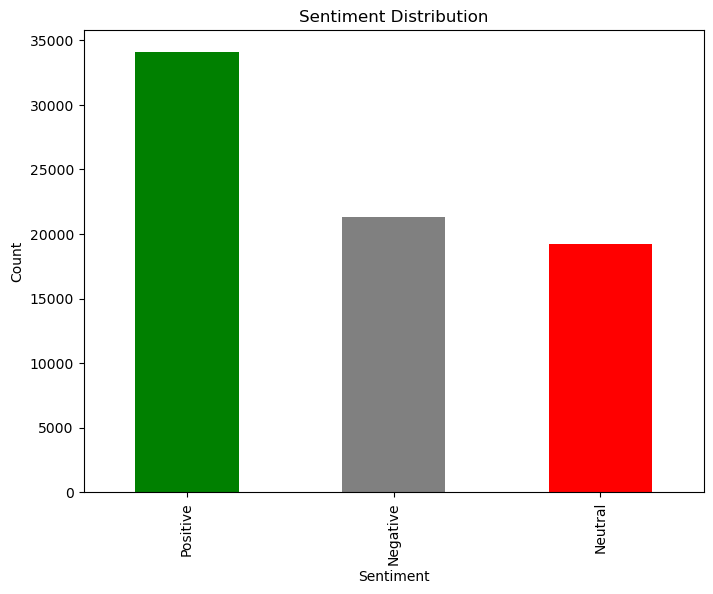

In [6]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
# Group by topic/brand and sentiment
topic_sentiment = df.groupby(['Topic', 'Calculated_Sentiment']).size().unstack().fillna(0)

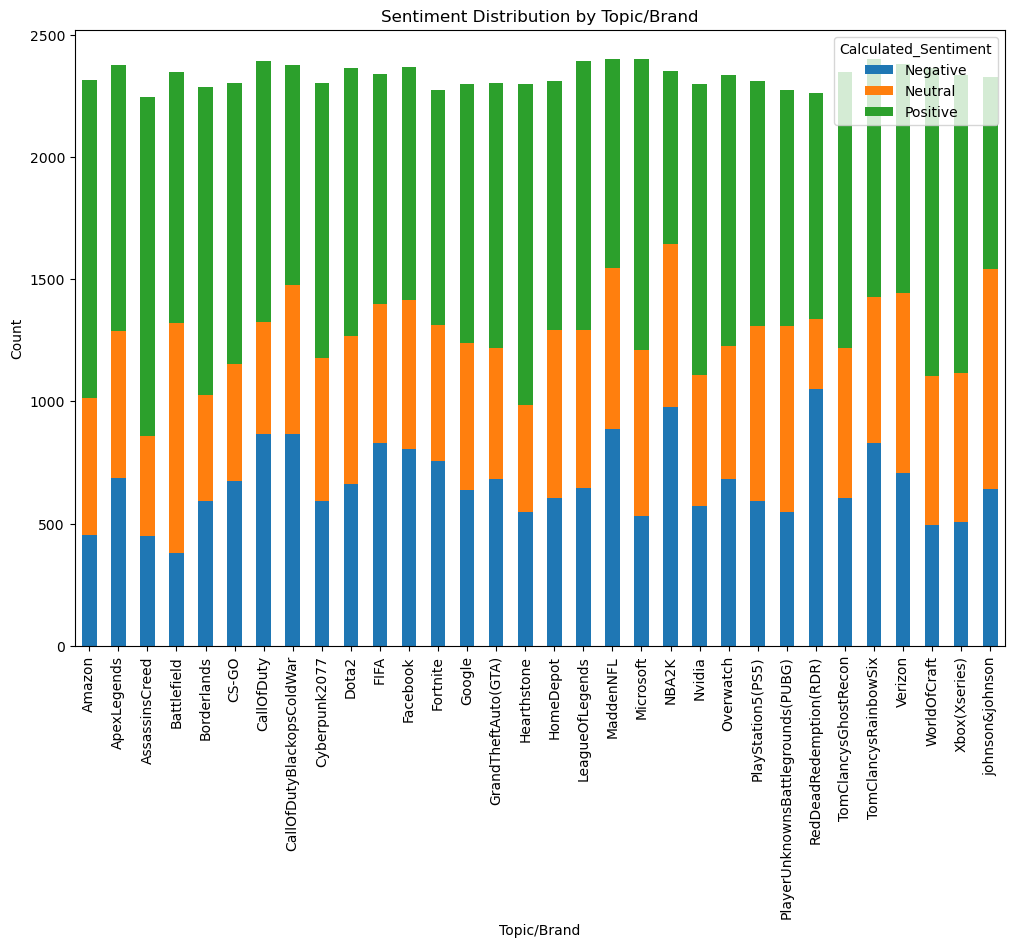

In [8]:
# Plot the sentiment distribution for each topic/brand
topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Topic/Brand')
plt.xlabel('Topic/Brand')
plt.ylabel('Count')
plt.show()